In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Load the CSV file
file_path = 'Resources/daily_returns_master.csv'  
# Update this path
data = pd.read_csv(file_path)


In [3]:

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Sort data by date
data = data.sort_values(by='date')


In [4]:

# drop missing daily_return values
data['daily_return'] = data['daily_return'].dropna()



In [5]:
#Get all stock symbols in dataset
print(data['symbol'].unique())
# Remove INDU as we decided not to use that ETF for comparison. DOW instead
symbols = ['META', 'PANW', 'AMZN', 'NVDA', 'ANET', 'TSLA', 'AMD', 'DOW', 'SPY', 'NOW', 'AI', 'PATH']

# split the data up by dataframe
data_split = []
for symbol in symbols:
    temp_df = data[data['symbol'].eq(symbol)].copy()
    temp_df = temp_df.sort_values(by='date')
    data_split.append((symbol, temp_df))

['META' 'PANW' 'AMZN' 'NVDA' 'ANET' 'TSLA' 'INDU' 'AMD' 'DOW' 'SPY' 'NOW'
 'AI' 'PATH']


In [6]:
for _, df in data_split:
    # Calculate cumulative returns
    df['cumulative_return'] = (1 + df['daily_return']).cumprod() - 1


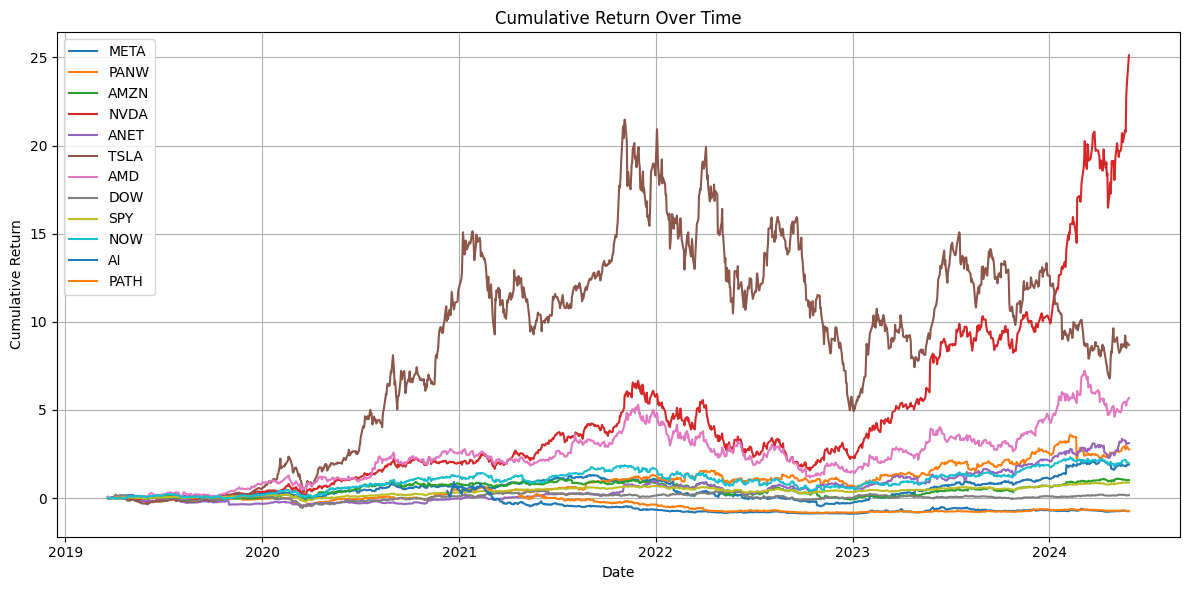

In [7]:

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
for symbol, data in data_split:
    plt.plot(data['date'], data['cumulative_return'], label=symbol)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

#save fig before show or else it saves an empty canvas
plt.savefig('Plots/cumulative_returns_all.png')
# Show the plot
plt.show()

# Save the figure
plt.close()


In [8]:
data_split[0][1]

,date,symbol,open,high,low,close,volume,daily_return,cumulative_return
7406,2019-03-20,META,161.500000,166.119995,161.240005,165.440002,20211500,NaN,NaN
7407,2019-03-21,META,164.889999,166.389999,163.750000,166.080002,16223000,0.003868,0.003868
7408,2019-03-22,META,165.649994,167.419998,164.089996,164.339996,16389200,-0.010477,-0.006649
7409,2019-03-25,META,163.000000,166.539993,162.000000,166.289993,12631200,0.011866,0.005138
7410,2019-03-26,META,167.350006,169.449997,166.350006,167.679993,15437900,0.008359,0.013540
...,...,...,...,...,...,...,...,...,...
8708,2024-05-21,META,467.119995,470.700012,462.269989,464.630005,11742200,-0.008980,1.808450
8709,2024-05-22,META,467.869995,473.720001,465.649994,467.779999,10078600,0.006780,1.827490
8710,2024-05-23,META,472.880005,474.359985,461.540009,465.779999,11747900,-0.004276,1.815401
8711,2024-05-24,META,467.619995,479.850006,466.299988,478.220001,12012300,0.026708,1.890595


In [9]:
combined_df = pd.DataFrame({
    'date':[],
    'symbol':[],
    'open':[],
    'high':[],
    'low':[],
    'close':[],
    'volume':[],
    'daily_return':[],
    'cumulative_return':[]
})

data_AI_merged = []

for symbol, df in data_split:
    if symbol not in ['DOW', 'SPY', 'INDU']:
        df = df.dropna()
        combined_df = pd.concat([combined_df, df])
    if symbol in ['DOW', 'SPY']:
        data_AI_merged.append((symbol, df))

/tmp/ipykernel_32885/1039744327.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([combined_df, df])


In [10]:
#reduce the dataframe to only date and cuml return columns
combined_df_reduced = combined_df[['date','cumulative_return']]
# group by date for average cumulative return
grouped_by_date = combined_df_reduced.groupby('date').mean()
grouped_by_date.reset_index(inplace=True)
grouped_by_date

,date,cumulative_return
0,2019-03-21,0.031903
1,2019-03-22,-0.004525
2,2019-03-25,-0.008452
3,2019-03-26,0.003950
4,2019-03-27,-0.003234
...,...,...
1301,2024-05-21,4.516142
1302,2024-05-22,4.467008
1303,2024-05-23,4.587996
1304,2024-05-24,4.720914


In [11]:
data_AI_merged.append(('Avg AI cumulative return', grouped_by_date))


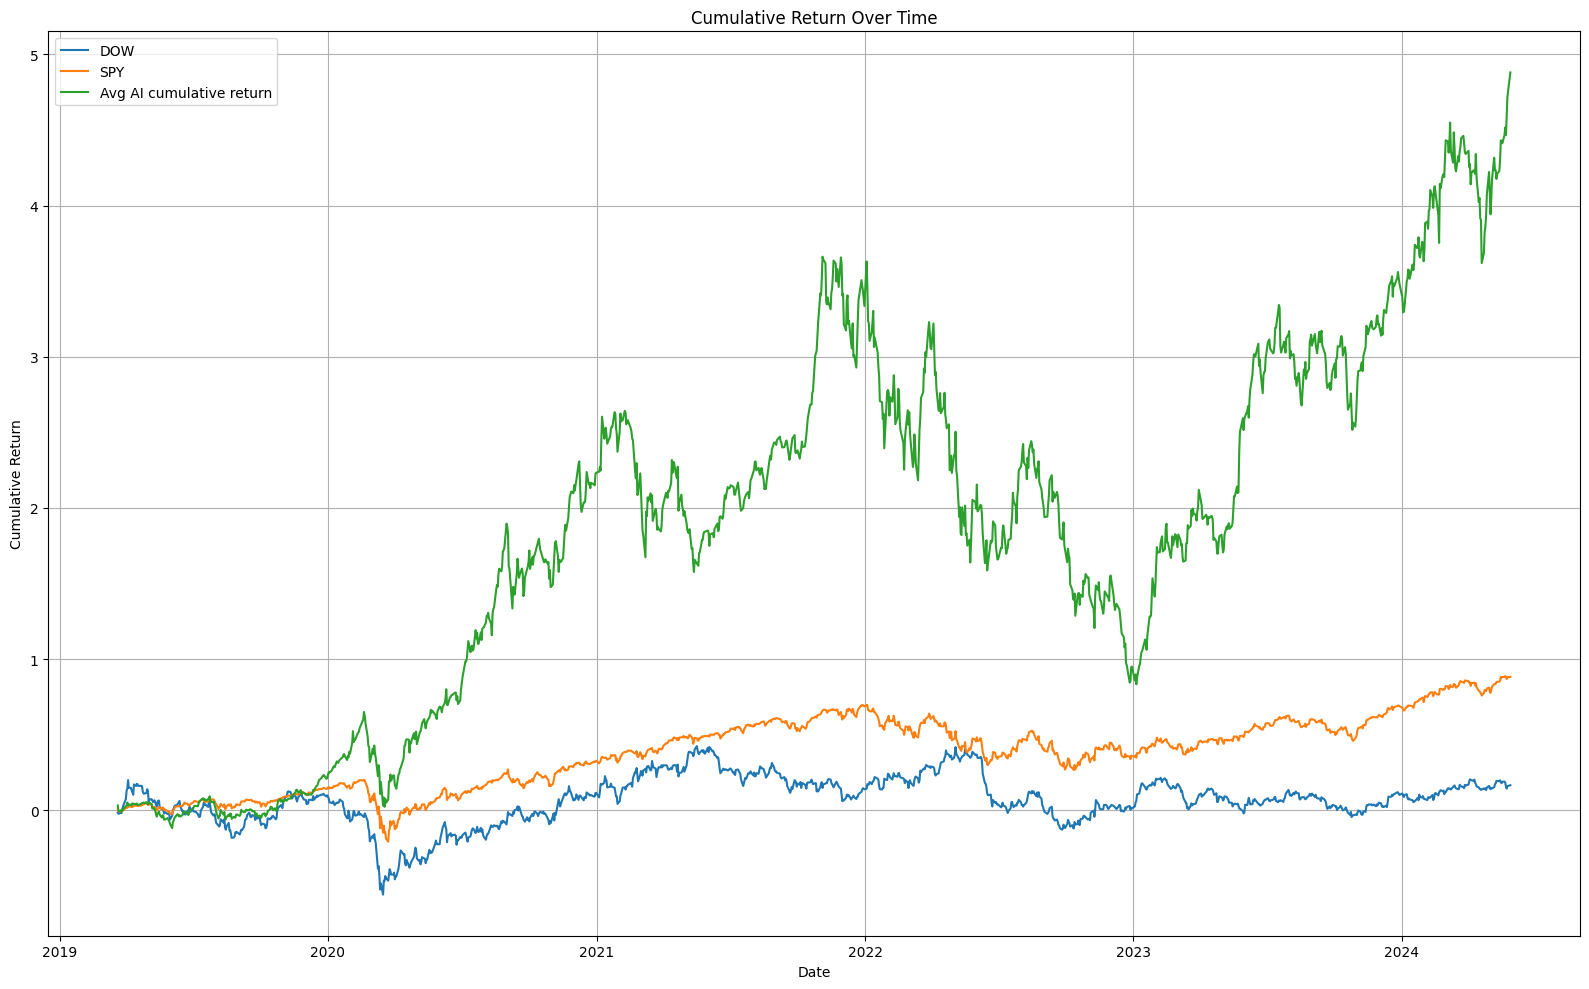

In [15]:

# Plot the cumulative returns
plt.figure(figsize=(16, 10))
for symbol, data in data_AI_merged:
    plt.plot(data['date'], data['cumulative_return'], label=symbol)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

#save fig before show or else it saves an empty canvas
plt.savefig('Plots/cumulative_returns_avging_AI.png')
# Show the plot
plt.show()

# Save the figure
plt.close()